## 3. A Linear Regression Model

After all the basic tutorials, we can combine them into some real-life cases. Here we fit a Linear Regression Model with `boomdiff` and synthetic 2D data.

#### 0. Problem description

We synthesize N observations of 2D X-y pair data. We expect y is a linear funcion of X as:

$$y = f(X) = wX + b$$

We would like to find the best w and b to minimize the mean squared error:

$${\arg \min}_{w,b} \frac{1}{N}[\sum_{k=1}^N(wX^k+b-y)^2]$$

#### 1. import necessasy packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from boomdiff import AD, optimize, loss_function

#### 2. Prepare some synthetic data

In [9]:
w_true = 2.4
b_true = -0.7

X_train = np.linspace(0,10,100)
y_train = w_true*X_train + b_true + np.random.normal(0,2,size=100)

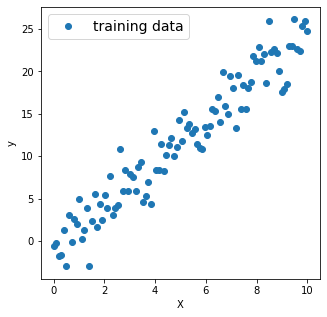

In [14]:
# Visualize
plt.figure(figsize=[5,5])
plt.plot(X_train,y_train,'o',label='training data')
plt.legend(fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### 3. Initialize parameters

In [19]:
w = AD(1,"w")
b = AD(1,"b")

#### 4. Define MSE loss function

In [22]:
loss = lambda: AD.mean((w*X_train + b - y_train)**2)

In [23]:
loss()

58.22882533395457 ({'w': -83.95571864211708, 'b': -11.476565970972283})

#### 5. Initialize an optimizer

In [24]:
opt = optimize.Adam(learning_rate=0.1)

#### 6. Update the variables

In [25]:
opt.minimize(loss, [w,b], steps=500, record=True)

#### 7. show the result

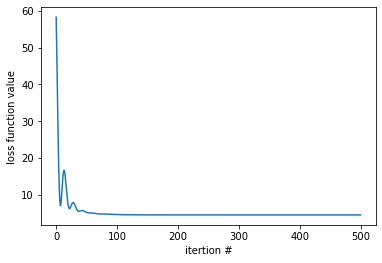

In [26]:
opt.plot_loss_func()

#### 8. Evaluate the optimization results

In [27]:
print("True w and Ture b:")
print(w_true, b_true)
print("======================")
print("optimized w and b")
print(w.value(), b.value())

True w and Ture b:
2.4 -0.7
optimized w and b
2.5627903519146007 -1.0756528549384172


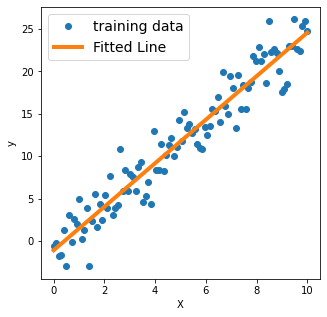

In [31]:
# visualize the fitted curve
plt.figure(figsize=[5,5])
plt.plot(X_train,y_train,'o',label='training data')
plt.plot(X_train,X_train*w.value()+b.value(), lw=4, label='Fitted Line')
plt.legend(fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.show()